# Plots for supplementary materials of paper
<a class="anchor" id="top"></a>
<p align="right">

Variable is
+ $\eta_0$ - reference viscosity [$10^{14},10^{24}$]Pas - params_2

Fixed values are:
+ $\phi_{RCMF}$=0.3
+ $\beta=0.0225\,K^{-1}$
+ $\eta_l=100$Pas
+ $\alpha_n=30$
+ $^{60}Fe/^{56}Fe = 10^{-8}$
+ $X_{S,0}=29.5$wt%
+ r=300km

This notebook creates the plots to justify explanantions in Paper 2 which are included in the supplementary material. The plotting code is correct but the variables and importing are not currently set up for plotting, so this notebook won't run.

# Set-up
This can be run once for a specific variable

## Import libraries 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns

Colours for plotting (there are a lot as there are a lot of values of $\eta_0$)

In [6]:
colors = ['black','darkblue','blue','royalblue','cornflowerblue','paleturquoise','salmon','maroon','saddlebrown','chocolate','orange','tan','olive','olivedrab','yellowgreen','darkolivegreen']

## Import data

In [7]:
folder = 'Paper_run4/'
subfolders = {'rcmf':1,'eta0':2,'beta':3,'etal':4,'Xs_0':5,'Fe0':6,'alpha_n':7,'r':8}
labels = {'rcmf':'$\\phi_{{RCMF}}$','eta0':'$\\eta_0$','beta':'$\\beta$','etal':'$\\eta_l$ ','Xs_0':'$X_{{s,0}}$','Fe0':'$^{{60}}Fe/^{{56}}Fe$','alpha_n':'$\\alpha_n$','r':'radius'}
Myr = 365*24*3600*1e6 #number of s in Myr

Choose your variable of interest

In [8]:
var = 'eta0'
unit = 'Pas' #unit of variable
varlab = labels[var]
logvar = True
save = False
path = '../Results_combined/'+folder+f"params_{subfolders[var]}/"

Import the temperature profile data for the two endmembers

In [9]:
#find run numbers
var_data = pd.read_csv(path+'auto_params.csv',skiprows=[1])
var_results = pd.read_csv(f'../Results_combined/{folder}/all_sucess_info.csv',skiprows=[1])
minrun = min(var_data['run'])
maxrun = max(var_data['run'])
nrun = len(var_data)
data = var_results[(var_results['run']>=minrun)&(var_results['run']<=maxrun)].copy(deep=True)
data.reset_index(inplace=True,drop=True)

Find min and max var values for labelling

In [10]:
var1=var_data.loc[var_data['run']==minrun,var].values[0]
var2=var_data.loc[var_data['run']==maxrun,var].values[0]

## Import lowest endmember

In [11]:
#End member 1
run = int(minrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t1 = npzfile['t']/Myr #time in Myr
d01 = npzfile['d0'] 
dl1 = npzfile['dl']
f1 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs1 = Flux[0]
Fcmb1 = Flux[1]
Fad1 = Flux[2]
Frad1 = Flux[3]

#time for field to be on
on11=var_results.loc[var_results['run']==minrun,'magon_1'].values[0]
off11=var_results.loc[var_results['run']==minrun,'magoff_1'].values[0]
on12=var_results.loc[var_results['run']==minrun,'magon_2'].values[0]
off12=var_results.loc[var_results['run']==minrun,'magoff_2'].values[0]
on13=var_results.loc[var_results['run']==minrun,'magon_3'].values[0]
off13=var_results.loc[var_results['run']==minrun,'magoff_3'].values[0]

#get time for switch to conduction
fcond_t1 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]
#Concatenate
Tall_1 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_1 = np.append(tdiff,t1)
d0_all_1 = np.append(d0_diff,d01)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r1 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_1 = np.arange(0,r1+dr,dr)/1e3

In [12]:
#find unstable indices for plotting core stratification
r_unstable1=np.array([]) 
for ind in min_unstable:
    r_unstable1 = np.append(r_unstable1,rplot_1[int(ind)])
rc1 = r1/2

## Import highest endmember

In [13]:
#End member 2
run = int(maxrun)
npzfile = np.load(f'{path}run_{run}_diff.npz')
Tdiff = npzfile['Tdiff'] 
tdiff = npzfile['t_diff']/Myr
d0_diff = npzfile['d0']

npzfile = np.load(f'{path}run_{run}.npz')
T_profile = npzfile['T_profile']
t2 = npzfile['t']/Myr #time in Myr 
d02 = npzfile['d0'] 
dl2 = npzfile['dl']
f2 = npzfile['f']
min_unstable = npzfile['min_unstable'] 
Flux = npzfile['Flux']
Fs2 = Flux[0]
Fcmb2 = Flux[1]
Fad2 = Flux[2]
Frad2 = Flux[3]

#time for field to be on
on21=var_results.loc[var_results['run']==maxrun,'magon_1'].values[0]
off21=var_results.loc[var_results['run']==maxrun,'magoff_1'].values[0]
on22=var_results.loc[var_results['run']==maxrun,'magon_2'].values[0]
off22=var_results.loc[var_results['run']==maxrun,'magoff_2'].values[0]
on23=var_results.loc[var_results['run']==maxrun,'magon_3'].values[0]
off23=var_results.loc[var_results['run']==maxrun,'magoff_3'].values[0]
#get time for switch to conduction
fcond_t2 = var_results.loc[var_results['run']==run,'fcond_t'].values[0]

#Concatenate
Tall_2 = np.hstack((Tdiff,np.transpose(T_profile)))
tall_2 = np.append(tdiff,t2)
d0_all_2 = np.append(d0_diff,d02)
dr = var_data.loc[var_data['run']==run,'dr'].values[0]
r2 = var_data.loc[var_data['run']==run,'r'].values[0]
rplot_2 = np.arange(0,r2+dr,dr)/1e3

In [14]:
#find unstable indices for plotting core stratification
r_unstable2=np.array([]) 
for ind in min_unstable:
    r_unstable2 = np.append(r_unstable2,rplot_2[int(ind)])
rc2 = r2/2

In [16]:
tend = max(np.max(t1),np.max(t2)) #upper limit for time axes

# Rem for $X_{S,0}$

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
ax2 = ax[0].twinx()
ax3 = ax[1].twinx()

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    tplot = npzfile['t']/Myr
    B = npzfile['B']/1e-6
    Rem = npzfile['Rem']
    buoy = npzfile['buoyr'] #ratio of compositional/thermal flux
    threshold=10
    size=2.5 #size of points on scatter plot
    
    #B plot
    if var =='eta0':
        ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.1e} {unit}')
    else:
        ax[0].plot(tplot,np.ma.masked_where(Rem<threshold,B),color=colors[i],label=f'{varlab}={varval:.2f} {unit}')
    ax2.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],alpha=0.5,linestyle='dashed')
    
    #Rem plot
    if i == 0:   
        ln1 = ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i],label='Rem')
        ln2 = ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5, label='Buoyancy/thermal flux')
    else:
        ax[1].plot(tplot,np.ma.masked_where(Rem<=0,Rem),color=colors[i])
        ax3.plot(tplot[buoy>0],buoy[buoy>0],color=colors[i],linestyle='dashed',alpha=0.5)
    
ax[1].hlines(10,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='--')
ax[1].hlines(40,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='-.')
ax[1].hlines(100,xmin=0,xmax=tplot[Rem>0][-1],color='dimgray',linestyle='dotted')

ax[0].set_ylabel('Surface dipole field strength $\\mu$T')
ax[1].set_ylabel('Magnetic Reynolds number')
ax2.set_ylabel('Buoyancy flux/thermal flux')
ax3.set_ylabel('Buoyancy flux/thermal flux')

ax[1].set_xlabel('Time/Myr')
ax[0].legend(ncols=2,loc='upper center')
ax[1].legend(ln1+ln2,['Rem','Buoyancy flux/thermal flux'],loc='upper center')
#ax[0].set_xscale('log')
#ax[1].set_xscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax[0].set_title('Magnetic field strength')
ax[1].set_title('Magnetic Reynolds number')
ax[1].set_xlim(left=0.8)
ax[1].set_ylim([5,50])
#ax[1].set_xlim([100,110])
if save==True:
    plt.savefig(f'../Plots/{folder}BRem_buoy_{var}.png',dpi=450,bbox_inches='tight')

# $F_{CMB}$ for $\beta$

In [ ]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Mantle top and bottom boundary layer thickness for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    rmantle = var_data.loc[var_data['run']==run,'r'].values[0]/2
    fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    Fcmb = npzfile['Flux'][1]
    
    plt.plot(t,Fcmb,label=f'{varlab}={varval:.2g}{unit}',color=colors[i])
       
plt.xlabel('Time/Myr')
plt.ylabel('Fcmb/W$m^{-2}$')
plt.legend()
plt.xlim([0.8,tend])

if save == True:
    plt.savefig(f'../Plots/{folder}Fcmb_{var}.png',dpi=450,bbox_inches='tight')

# $\phi_{RCMF}$ lid thickness

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex='col',tight_layout=True,figsize=[10,8])
fig.suptitle(f'Stagnant lid thickness for changes in {varlab}')

for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    rmantle = var_data.loc[var_data['run']==run,'r'].values[0]/2
    fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    d0 = npzfile['d0']
    dl = npzfile['dl']
    Tm_conv = npzfile['Tm_conv']
    if fcond_t > 0:
        ax[0].plot(t[(t<=fcond_t)&(d0<rmantle)],1-d0[(t<=fcond_t)&(d0<rmantle)]/rmantle,label=f'{varlab}={varval:.2g}',color=colors[i])
        if i==0:
            ax[1].plot(t[(t<=fcond_t)&(d0<rmantle)],dl[(t<=fcond_t)&(d0<rmantle)]/rmantle,linestyle='dashed',color=colors[i],label='$\delta_l$')
        else:
            ax[1].plot(t[(t<=fcond_t)&(d0<rmantle)],dl[(t<=fcond_t)&(d0<rmantle)]/rmantle,linestyle='dashed',color=colors[i])
    else:
        ax[0].plot(t,d0/rmantle,label=f'{var}={varval:.2g}',color=colors[i])
    if i==0:
        ax[0].vlines(t[(Tm_conv-1400)/(400)<varval][0],0,1,color=colors[i],linestyle='dotted',label='$T_m<T_{RCMF}$')
        ax[1].vlines(t[(Tm_conv-1400)/(400)<varval][0],0,1,color=colors[i],linestyle='dotted',label='$T_m<T_{RCMF}$')
    else:
        ax[0].vlines(t[(Tm_conv-1400)/(400)<varval][0],0,1,color=colors[i],linestyle='dotted')
        ax[1].vlines(t[(Tm_conv-1400)/(400)<varval][0],0,1,color=colors[i],linestyle='dotted')
ax[1].set_xlabel('Time/Myr')
ax[0].set_ylabel('Depth of base of $\delta_0$ in mantle/mantle thickness')
ax[1].set_ylabel('Height of top of $\delta_l$ in mantle/mantle thickness')
ax[0].legend(loc='center left')
ax[1].legend()
ax[1].set_yscale('log')
ax[0].set_xlim([1.2,20])
ax[0].set_ylim([0.5,1])
if save == True:
    plt.savefig(f'../Plots/{folder}d0_{var}.png',dpi=450,bbox_inches='tight')

## $\eta_0$ Stagnant lid thickness <a class="anchor" id="lid"></a>
<p align="right">(<a href="#top">back to top</a>)</p>

Choose variable of interest

In [8]:
var = 'eta0'
unit = 'Pas' #unit of variable
varlab = labels[var]
logvar = True
save = False
path = '../Results_combined/'+folder+f"params_{subfolders[var]}/"

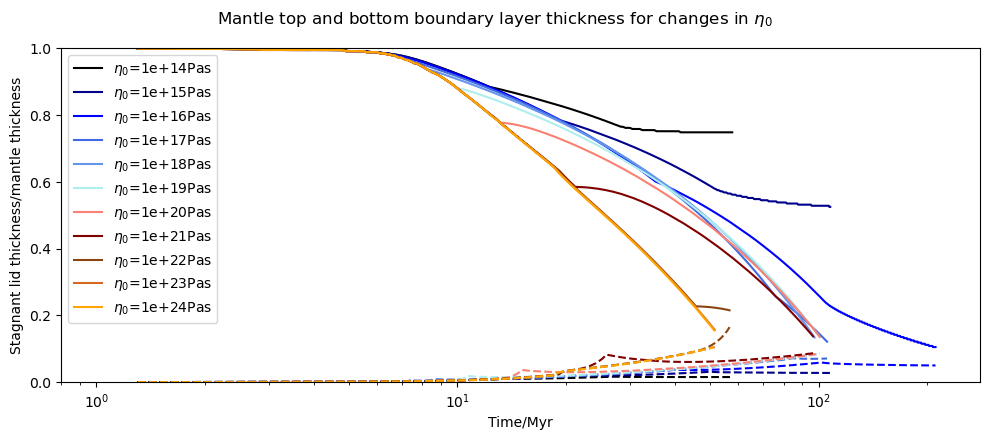

In [28]:
plt.figure(tight_layout=True,figsize=[10,8])
plt.suptitle(f'Mantle top and bottom boundary layer thickness for changes in {varlab}')
plt.subplot(2,1,1)
for i in range(nrun):
    run = int(minrun+i)
    varval = var_data.loc[var_data['run']==run,var].values[0]
    rmantle = var_data.loc[var_data['run']==run,'r'].values[0]/2
    fcond_t=var_results.loc[var_results['run']==run,'fcond_t'].values[0]
    if var=='r':
        varval = varval/1e3
    #import data
    npzfile = np.load(f'{path}run_{run}.npz')
    t = npzfile['t']/Myr #time in Myr
    d0 = npzfile['d0']
    dl = npzfile['dl']
    if fcond_t > 0:
        plt.plot(t[t<=fcond_t],1-d0[t<=fcond_t]/rmantle,label=f'{varlab}={varval:.2g}{unit}',color=colors[i])
        plt.plot(t[t<=fcond_t],dl[t<=fcond_t]/rmantle,color=colors[i],linestyle='dashed')
    else:
        plt.plot(t,1-d0/rmantle,label=f'{varlab}={varval:.2g}{unit}',color=colors[i])
        plt.plot(t,dl/rmantle,color=colors[i],linestyle='dashed')
plt.xlabel('Time/Myr')
plt.ylabel('Stagnant lid thickness/mantle thickness')
plt.legend()
plt.xscale('log')
plt.xlim([0.8,tend])
plt.ylim([0,1])
if save == True:
    plt.savefig(f'../Plots/{folder}d0_{var}.png',dpi=450,bbox_inches='tight')